In [15]:
import numpy as np
import sys
import pandas as pd
sys.path.append('../')
import matplotlib.pyplot as plt

In [16]:

def eval_f_bind_competitive_2(n_b_arr, n_m_pair, e_m_arr,\
                        j_int_g1g1, j_int_g1g2, j_int_g2g2):
    r"""
    ALT f bind were there is an unfavorable binding energy when bound to unmarked tails (e_m > 0)
    MODEL WHERE 2 DISTINCT MARK PROFILES.v still max 2 proteins bound
    eval_f_bind - Evaluate the binding free energy
    
    Parameters
    ----------
    n_b : integer
        Number of reader proteins bound to the nucleosome
    n_m : integer
        Number of marked tails
    e_me3 : float
        Favorable binding free energy to tri-methylated tails
        
    Returns
    -------
    f_bind : float
        Binding free energy
    
    """
    # Calculate the cases for the binding free energy
    f_bind = 0
    n_m1 = n_m_pair[0]
    n_m2 = n_m_pair[1]
    
    if n_m1 == n_m2:
        n_m = n_m1
        
        if n_b_arr==[0,0]:
            f_bind = 0
        elif n_b_arr==[1,0]:
            if n_m == 0:
                f_bind = -np.log(2) + e_m_arr[0]
            elif n_m == 1:
                f_bind = -np.log(np.exp(-e_m_arr[0]) + 1)
            elif n_m == 2:
                f_bind = -np.log(2)
        elif n_b_arr==[0,1]:
            if n_m == 0:
                f_bind = -np.log(2) + e_m_arr[1]
            elif n_m == 1:
                f_bind = -np.log(np.exp(-e_m_arr[1]) + 1)
            elif n_m == 2:
                f_bind = -np.log(2)
        elif n_b_arr==[1,1]:
            if n_m == 0:
                f_bind = -np.log(2)+j_int_g1g2 + e_m_arr[0] + e_m_arr[1] 
            elif n_m == 1:
                f_bind = -np.log(np.exp(-e_m_arr[0]) + np.exp(-e_m_arr[1]))+j_int_g1g2
            elif n_m == 2:
                f_bind = -np.log(2) + j_int_g1g2
        elif n_b_arr==[2,0]:
            if n_m == 0:
                f_bind = 2*e_m_arr[0]+j_int_g1g1
            elif n_m == 1:
                f_bind = e_m_arr[0]+j_int_g1g1
            elif n_m == 2:
                f_bind = j_int_g1g1
        elif n_b_arr==[0,2]:
            if n_m == 0:
                f_bind = 2*e_m_arr[1]+j_int_g2g2
            elif n_m == 1:
                f_bind = e_m_arr[1]+j_int_g2g2
            elif n_m == 2:
                f_bind = j_int_g2g2
    
    elif n_m1 == 1 and n_m2 == 0:
        if n_b_arr==[0,0]:
            f_bind = 0
        elif n_b_arr==[1,0]:
            f_bind = -np.log(np.exp(-e_m_arr[0]) + 1)
        elif n_b_arr==[0,1]:
            f_bind = -np.log(2) +  e_m_arr[1]
        elif n_b_arr==[1,1]:
            f_bind = -np.log(np.exp(-e_m_arr[0]) + 1) +j_int_g1g2 +  e_m_arr[1]
        elif n_b_arr==[2,0]:
            f_bind = e_m_arr[0]+j_int_g1g1
        elif n_b_arr==[0,2]:
            f_bind = 0+j_int_g2g2 + 2*e_m_arr[1]
    elif n_m1 == 0 and n_m2 == 1:
        if n_b_arr==[0,0]:
            f_bind = 0
        elif n_b_arr==[0,1]:
            f_bind = -np.log(np.exp(-e_m_arr[1]) + 1)
        elif n_b_arr==[1,0]:
            f_bind = -np.log(2) +  e_m_arr[0]
        elif n_b_arr==[1,1]:
            f_bind = -np.log(np.exp(-e_m_arr[1]) + 1) +j_int_g1g2 +  e_m_arr[0]
        elif n_b_arr==[0,2]:
            f_bind = e_m_arr[1]+j_int_g2g2
        elif n_b_arr==[2,0]:
            f_bind = 0+j_int_g1g1 + 2*e_m_arr[0]
            
    elif n_m1 == 2 and n_m2 == 0:
        if n_b_arr==[0,0]:
            f_bind = 0
        elif n_b_arr==[1,0]:
            f_bind = -np.log(2) 
        elif n_b_arr==[0,1]:
            f_bind = -np.log(2) + e_m_arr[1]
        elif n_b_arr==[1,1]:
            f_bind = -np.log(2) + e_m_arr[1] +j_int_g1g2
        elif n_b_arr==[2,0]:
            f_bind = j_int_g1g1
        elif n_b_arr==[0,2]:
            f_bind = 0+j_int_g2g2 + 2*e_m_arr[1]
    elif n_m1 == 0 and n_m2 == 2:
        if n_b_arr==[0,0]:
            f_bind = 0
        elif n_b_arr==[0,1]:
            f_bind = -np.log(2) 
        elif n_b_arr==[1,0]:
            f_bind = -np.log(2) + e_m_arr[0]
        elif n_b_arr==[1,1]:
            f_bind = -np.log(2) + e_m_arr[0] +j_int_g1g2
        elif n_b_arr==[0,2]:
            f_bind = j_int_g2g2
        elif n_b_arr==[2,0]:
            f_bind = 0+j_int_g1g1  + 2*e_m_arr[0]
            
    elif n_m1 == 2 and n_m2 == 1:
        if n_b_arr==[0,0]:
            f_bind = 0
        elif n_b_arr==[1,0]:
            f_bind = -np.log(2)
        elif n_b_arr==[0,1]:
            f_bind = -np.log(np.exp(-e_m_arr[1]) + 1)
        elif n_b_arr==[1,1]:
            f_bind = -np.log(np.exp(0) + np.exp(-e_m_arr[1])) +j_int_g1g2
        elif n_b_arr==[2,0]:
            f_bind = j_int_g1g1
        elif n_b_arr==[0,2]:
            f_bind =  e_m_arr[1]+j_int_g2g2
    elif n_m1 == 1 and n_m2 == 2:
        if n_b_arr==[0,0]:
            f_bind = 0
        elif n_b_arr==[0,1]:
            f_bind = -np.log(2) 
        elif n_b_arr==[1,0]:
            f_bind = -np.log(np.exp(-e_m_arr[0]) + 1)
        elif n_b_arr==[1,1]:
            f_bind = -np.log(np.exp(0) + np.exp(-e_m_arr[0])) +j_int_g1g2
        elif n_b_arr==[0,2]:
            f_bind = j_int_g2g2
        elif n_b_arr==[2,0]:
            f_bind =  e_m_arr[0]+j_int_g1g1
    
    return f_bind

def eval_f_bind_competitive_arr_2(n_b_arr, n_m_arr_1, n_m_arr_2, e_m_arr,\
                        j_int_g1g1, j_int_g1g2, j_int_g2g2):
    r"""
    eval_f_bind - Evaluate the binding free energy
    
    Parameters
    ----------
    n_b : integer
        Number of reader proteins bound to the nucleosome
    n_m : integer
        Number of marked tails
    e_me3 : float
        Favorable binding free energy to tri-methylated tails
        
    Returns
    -------
    f_bind : float
        Binding free energy
    
    """
    # Calculate the cases for the binding free energy
    n_m_pair_arr = np.column_stack((n_m_arr_1,n_m_arr_2))
    
    f_bind_arr = np.zeros(len(n_m_arr_1))
    
    for i,n_m_pair in enumerate(n_m_pair_arr):
        f_bind = eval_f_bind_competitive_2(n_b_arr, n_m_pair, e_m_arr, j_int_g1g1, j_int_g1g2, j_int_g2g2)

        f_bind_arr[i] = f_bind
    return f_bind_arr

In [104]:
def calc_s_bind_comp(ws, mus, f_binds):
    f_bind_10, f_bind_01, f_bind_20, f_bind_02, f_bind_11 = f_binds
    mu_1, mu_2 = mus
    sigma1, sigma2 = sigmas
    w1, w2 = ws

    # boltzmann probability of each binding state [s_HP1, s_PRC1]
    p_00 = 1
    p_10 = np.exp(-f_bind_10 + mu_1*1 - w_1*1) 
    p_01 = np.exp(-f_bind_01 + mu_2*1 - w_2*1)
    p_20 = np.exp(-f_bind_20 + mu_1*2 - w_1*2)
    p_02 = np.exp(-f_bind_02 + mu_2*2 - w_2*2)
    p_11 = np.exp(-f_bind_10 + mu_1*1 - w_1*1  - f_bind_01 + mu_2*1 - w_2*1)
    
    q_bind = p_00 + p_01 + p_10 + p_02 + p_20 + p_11 #1. + np.exp(-eps * sigma + mu - w)
    s_bind1 = (1*p_10 + 2*p_20 + 1*p_11) / q_bind #(f_bind_20 + mu_1 - w_1) + 1*(f_bind_11 + mu_1 - w_1 + mu_2 - w_2) / q_bind
    s_bind2 = (1*p_01 + 2*p_02 + 1*p_11) / q_bind #np.exp(1*(f_bind_01 + mu_2 - w_2) + 2*(f_bind_02 + mu_2 - w_2) + 1(*f_bind_11 + mu_1 - w_1 + mu_2 - w_2) / q_bind

    s_binds = [s_bind1, s_bind2]
    return s_binds

In [322]:
# x: genomic distance
#a = 2.6065
# a = 2.6075, mu = -4.8, v_int = -2 : get bridging
def calc_p_loop(x, a = 2.6075):
    
    p_loop = a / np.abs(x) ** (1.5)
    
    return p_loop

In [324]:
# 2 marks competitive

n_nuc = 100
n_iter = 70

w_1 = np.zeros(n_nuc)
w_2 = np.zeros(n_nuc)
ws = [w_1, w_2]

# mus = [-4.8,-4.8]
mus = [-4.8,-10]
# eps = -2
# j = -2

sigma_1 = np.random.randint(1, size = n_nuc)
sigma_1[20:40] = 2
sigma_1[60:80] = 2

sigma_2 = np.random.randint(1, size = n_nuc)
sigma_2[40:60] = 2
sigma_2[80:100] = 2

sigmas = [sigma_1, sigma_2]

# e_m = [1.52, 1.52]
# v_int = np.array([[-4,0],[0,-4]])

e_m = [2, 2]
v_int = np.array([[-2,0],[0,-2]])

f_bind_10 = eval_f_bind_competitive_arr_2([1,0], sigma_1, sigma_2, e_m, v_int[0, 0],v_int[0, 1],v_int[1, 1])
f_bind_01 = eval_f_bind_competitive_arr_2([0,1], sigma_1, sigma_2, e_m, v_int[0, 0],v_int[0, 1],v_int[1, 1])
f_bind_20 = eval_f_bind_competitive_arr_2([2,0], sigma_1, sigma_2, e_m, v_int[0, 0],v_int[0, 1],v_int[1, 1])
f_bind_02 = eval_f_bind_competitive_arr_2([0,2], sigma_1, sigma_2, e_m, v_int[0, 0],v_int[0, 1],v_int[1, 1])
f_bind_11 = eval_f_bind_competitive_arr_2([1,1], sigma_1, sigma_2, e_m, v_int[0, 0],v_int[0, 1],v_int[1, 1])
f_binds_comp = [f_bind_10, f_bind_01, f_bind_20, f_bind_02, f_bind_11]

for i in range(n_iter):
    s_arr = calc_s_bind_comp(ws, mus, f_binds_comp) # binding state of HP1 and PRC1
    # s = calc_s_bind(w, sigma, eps, mu)
    for i in range(n_nuc):
        p_loop = np.concatenate((calc_p_loop(np.arange(0,i)-i),np.array([0]),calc_p_loop(np.arange(i + 1, n_nuc)-i))) 
        # gives array of looping probs centered at ith nucleosome (at which probability = 0) 
        w_1[i] = v_int[0,0] * np.sum(p_loop * s_arr[0]) +  v_int[0,1] * np.sum(p_loop * s_arr[1])
        w_2[i] = v_int[1,1] * np.sum(p_loop * s_arr[1]) +  v_int[0,1] * np.sum(p_loop * s_arr[0])
        w_s = [w_1, w_2]
        # QUESTION: why is this the expression for w? saddle point equation?

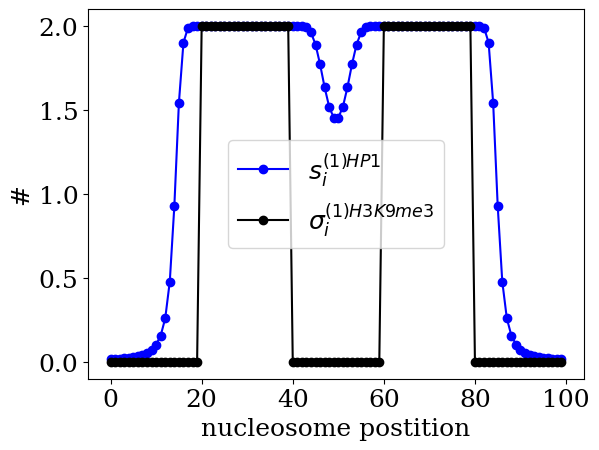

In [328]:
# QUESTION: why is final s_bind ("s") this way? middle unmarked section has binding
plt.figure()
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

plt.plot(s_arr[0], 'bo-', label = "$s^{(1)HP1}_i$")
# plt.plot(s_arr[1], 'ro-', label = "$s^{(2)PRC1}_i$")

plt.plot(sigma_1, 'ko-', label = "$\sigma^{(1)H3K9me3}_i$")
# plt.plot(sigma_2, 'go-', label = "$\sigma^{(2)H3K27me3}_i$")
plt.xlabel("nucleosome postition")
plt.ylabel("#")
plt.legend()

plt.show()

In [ ]:
# compare to andy result
# look at different v_int systems
# generate 2d density maps vs mu? to compare with theory
# Co-occupancy map. compare to chromo?

In [89]:
# single nucleosome binding partition function
def calc_q_bind(w, sigma, eps = 0, mu = 0):
    q_bind = 1. + np.exp(-eps * sigma + mu - w)
    
    return q_bind

In [90]:
# average s_bind
# sigma: mark state!
# QUESTION what is epsilon (binding param?)
def calc_s_bind(w, sigma, eps = 0, mu = 0):
    q_bind = 1. + np.exp(-eps * sigma + mu - w)
    s_bind = np.exp(-eps * sigma + mu - w) / q_bind
    
    return s_bind



In [91]:
# x: genomic distance
def calc_p_loop(x, a = 1):
    
    p_loop = a / np.abs(x) ** (1.5)
    
    return p_loop

In [5]:
np.arange(5, 10) - 4

array([1, 2, 3, 4, 5])

In [105]:
n_nuc = 100
n_iter = 70

w = np.zeros(n_nuc)

mu = -4.8
eps = -2
sigma = np.random.randint(1, size = n_nuc)
sigma[20:40] = 1
sigma[60:80] = 1
j = -2

for i in range(n_iter):
    s = calc_s_bind(w, sigma, eps, mu)
    for i in range(n_nuc):
        p_loop = np.concatenate((calc_p_loop(np.arange(0,i)-i),np.array([0]),calc_p_loop(np.arange(i + 1, n_nuc)-i))) 
        # gives array of looping probs centered at ith nucleosome (at which probability = 0) 
        w[i] = j * np.sum(p_loop * s)
        # QUESTION: why is this the expression for w? saddle point equation?

In [106]:
sigma

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

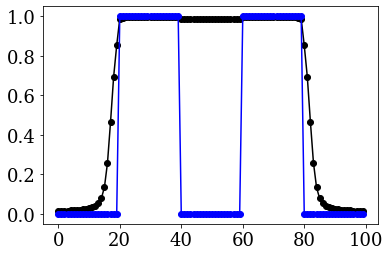

In [107]:
# QUESTION: why is final s_bind ("s") this way? middle unmarked section has binding
plt.figure()
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

plt.plot(s, 'ko-')
plt.plot(sigma, 'bo-')

plt.show()

In [86]:
n_nuc = 10000
n_iter = 20

w = np.zeros(n_nuc)

mu = -4.5
eps = -2
sigma = np.random.randint(2, size = n_nuc)
sigma[40:60] = 1
j = -2

for i in range(n_iter):
    s = calc_s_bind(w, sigma, eps, mu)
    for i in range(n_nuc):
        p_loop = np.concatenate((calc_p_loop(np.arange(0,i)-i),np.array([0]),calc_p_loop(np.arange(i + 1, n_nuc)-i)))
        w[i] = j * np.sum(p_loop * s)


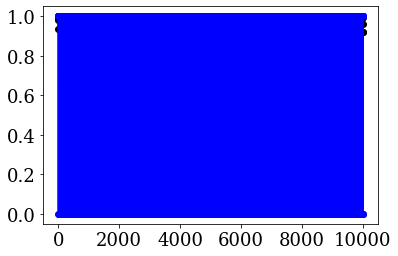

In [87]:
plt.figure()
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

plt.plot(s, 'ko-')
plt.plot(sigma, 'bo-')

plt.show()